Using data from this FiveThirtyEight post, write code to calculate the correlation of the responses from the poll.
Respond to the story in your PR. Is this a good example of data journalism? Why or why not?

In [1]:
import pandas as pd
%matplotlib inline
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data-iran.csv")

In [6]:
df.columns =['Group', 'Favor_Iran_Deal','Obama_Approve' ]

In [8]:
df.head()

,Group,Favor_Iran_Deal,Obama_Approve
0,Republicans,0.34,0.10
1,Democrats,0.60,0.78
2,White,0.45,0.35
3,Black,0.54,0.85
4,Ind,0.44,0.37


Create a new df just with data for Approve of Obama

In [10]:
df.corr()['Favor_Iran_Deal']

Favor_Iran_Deal    1.000000
Obama_Approve      0.913868
Name: Favor_Iran_Deal, dtype: float64

In [12]:
lm = smf.ols(formula="Favor_Iran_Deal~Obama_Approve",data=df).fit()

In [13]:
intercept, slope = lm.params

In [14]:
lm.summary()

c:\users\dongjin\envs\03stat\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Favor_Iran_Deal   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     81.06
Date:                Mon, 01 Aug 2016   Prob (F-statistic):           1.16e-07
Time:                        23:03:36   Log-Likelihood:                 37.901
No. Observations:                  18   AIC:                            -71.80
Df Residuals:                      16   BIC:                            -70.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3053      0.019     16.036      0.000       0.265       0.346
Obama_Approve     0.3556      0.039      9.003      0.000       0.272       0.439
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                0.621
Skew:                          -0.443   Prob(JB):                        0.733
Kurtosis:                       3.207   Cond. No.                         6.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

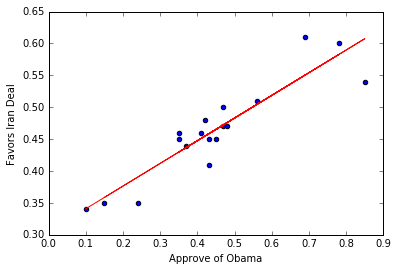

In [16]:
df.plot(kind="scatter",x="Obama_Approve",y="Favor_Iran_Deal")
plt.plot(df["Obama_Approve"],slope*df["Obama_Approve"]+intercept,"-",color="red") 
plt.xlabel('Approve of Obama')
plt.ylabel('Favors Iran Deal')